In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('telco_customer.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#handling missing value by median

df_update = df.copy()
df_update['TotalCharges'] = df_update['TotalCharges'].fillna(df_update['TotalCharges'].median())

In [ ]:
df_update.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

1. Normalize column TotalCharges
2. Standardize column TotalCharges
3. Do log transformation for column TotalCharges
4. Create 1 new feature based on 1 or more initial features
5. Encode InternetService column (assume it has hierarchy)
6. Encode PaymentMethod column (assume it doesn't has hierarchy)
7. Remove outliers from column TotalCharges (you can choose one method: z-score OR IQR)
8. Bin column tenure into 3 categories: Low Tenure, Medium Tenure, High Tenure (you can define your own threshold)


# 1. Normalize column TotalCharges


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_update[['TotalCharges']])
df_update['Normalized_TotalCharges'] = scaler.transform(df_update[['TotalCharges']])

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.215867
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330


# 2. Standardize column TotalCharges

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df_update[['TotalCharges']])
df_update['Std_TotalCharges'] = scaler.transform(df_update[['TotalCharges']])

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Std_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275,-0.994242
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0.215867,-0.173244
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310,-0.959674
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241,-0.194766
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330,-0.940470


# 3. Do log transformation for column TotalCharges

In [ ]:
df_update['TotalCharges_log'] = np.log(df_update['TotalCharges'] + 1)

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275,-0.994242,3.429137
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0.215867,-0.173244,7.544597
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310,-0.959674,4.692723
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241,-0.194766,7.518471
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330,-0.940470,5.028148


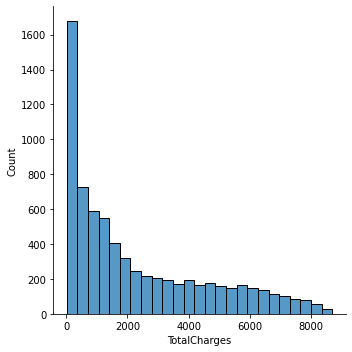

In [ ]:
sns.displot(df_update['TotalCharges'])

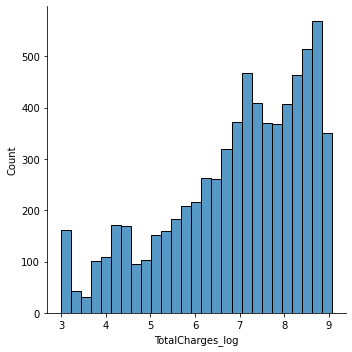

In [ ]:
sns.displot(df_update['TotalCharges_log'])

# 4. Create 1 new feature based on 1 or more initial features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


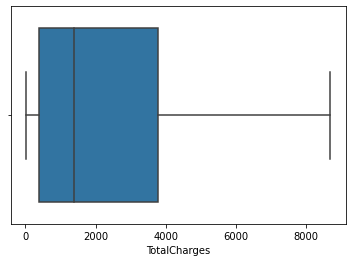

In [ ]:
#ingin membuat 1 feature baru dari TotalCharges, lihat persebarannya dulu
sns.boxplot(df_update['TotalCharges'])

In [ ]:
# Categorize Customer level based on total charges
def cust_cat(x):
    if x <= 2000:
        return 'Silver'
    elif x > 2000 and x <=3000:
        return 'Gold'
    elif x > 3000:
        return 'Platinum'
    
df_update['Cust_Category'] = df['TotalCharges'].apply(cust_cat)

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,Cust_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275,-0.994242,3.429137,Silver
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,0.215867,-0.173244,7.544597,Silver
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310,-0.959674,4.692723,Silver
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241,-0.194766,7.518471,Silver
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330,-0.940470,5.028148,Silver


# 5. Encode InternetService column (assume it has hierarchy)

In [ ]:
df_update['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

asumsikan urutan hirearki secara berurut: Fiber optic, DSL dan No

In [ ]:
df_update['InternetService'] = [1 if x == 'Fiber optic' else (2 if x == 'DSL' else 3) for x in df_update['InternetService']]

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,Cust_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,2,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275,-0.994242,3.429137,Silver
1,5575-GNVDE,Male,0,No,No,34,Yes,No,2,Yes,...,One year,No,Mailed check,56.95,1889.50,No,0.215867,-0.173244,7.544597,Silver
2,3668-QPYBK,Male,0,No,No,2,Yes,No,2,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310,-0.959674,4.692723,Silver
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,2,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241,-0.194766,7.518471,Silver
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330,-0.940470,5.028148,Silver


# 6. Encode PaymentMethod column (assume it doesn't has hierarchy)

In [ ]:
#menggunakan one hot encoding
ohe_payment = pd.get_dummies(df_update[['PaymentMethod']])
print(ohe_payment)

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4               

In [ ]:
#tambahkan ke df_update
df_update = pd.concat([df_update, ohe_payment], axis=1)

In [ ]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,Cust_Category,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,2,No,...,29.85,No,0.001275,-0.994242,3.429137,Silver,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,2,Yes,...,1889.50,No,0.215867,-0.173244,7.544597,Silver,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,2,Yes,...,108.15,Yes,0.010310,-0.959674,4.692723,Silver,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,2,Yes,...,1840.75,No,0.210241,-0.194766,7.518471,Silver,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,No,...,151.65,Yes,0.015330,-0.940470,5.028148,Silver,0,0,1,0


# 7. Remove outliers from column TotalCharges (you can choose one method: z-score OR IQR)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


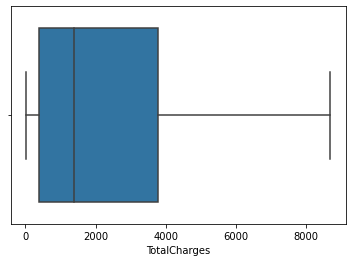

In [ ]:
sns.boxplot(df_update['TotalCharges'])

tidak terlihat outlier pada berdasarkan boxplot, akan dilakukan pengecekan dengan IQR

In [90]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [92]:
df_update['outlier_TotalCharges'] = check_outlier(data=df_update, column='TotalCharges')

In [93]:
#menampilkan baris data outlier dari kolom TotalCharges
df_update[df_update['outlier_TotalCharges'] == 'outlier']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,Cust_Category,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,outlier_TotalCharges


hasilnya tidak ada data dari totalCharges yang outlier

# 8. Bin column tenure into 3 categories: Low Tenure, Medium Tenure, High Tenure (you can define your own threshold)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


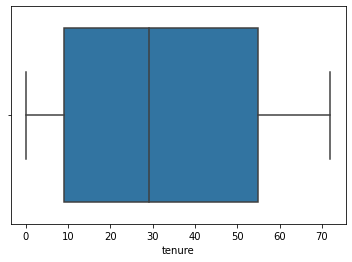

In [94]:
sns.boxplot(df_update['tenure'])

In [95]:
#bin tenure

def tenure_category(x):
    if x <= 25:
        return 'Low Tenure'
    elif x > 25 and x <=40:
        return 'Medium Tenure'
    elif x > 40:
        return 'High Tenure'
    
df_update['Tenure_Category'] = df['tenure'].apply(tenure_category)

In [96]:
df_update.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Normalized_TotalCharges,Std_TotalCharges,TotalCharges_log,Cust_Category,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,outlier_TotalCharges,Tenure_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,2,No,...,0.001275,-0.994242,3.429137,Silver,0,0,1,0,not-outlier,Low Tenure
1,5575-GNVDE,Male,0,No,No,34,Yes,No,2,Yes,...,0.215867,-0.173244,7.544597,Silver,0,0,0,1,not-outlier,Medium Tenure
2,3668-QPYBK,Male,0,No,No,2,Yes,No,2,Yes,...,0.010310,-0.959674,4.692723,Silver,0,0,0,1,not-outlier,Low Tenure
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,2,Yes,...,0.210241,-0.194766,7.518471,Silver,1,0,0,0,not-outlier,High Tenure
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,No,...,0.015330,-0.940470,5.028148,Silver,0,0,1,0,not-outlier,Low Tenure
